<a href="https://colab.research.google.com/github/hxxzn/DS_udangtang_tp/blob/main/DS_udangtang_tp_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.라이브러리 & 폰트 설정

###라이브러리 설정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
#칼럼 중간 잘리지 않게

pd.set_option('display.max_rows', None)

###한글화 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

##2.파일 업로드

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1kJwY2WWf8Oq1RKd_w6lZ7D3jofJLdZYB', encoding='cp949')

In [ ]:
df.head()

,지역,12.Jan,12.Feb,12.Mar,12.Apr,12.May,12.Jun,12.Jul,12.Aug,12.Sep,...,20.Sep,20.Oct,20.Nov,20.Dec,21.Jan,21.Feb,21.Mar,21.Apr,21.May,21.Jun
0,전국,264474.0,264035.0,263470.0,262630.0,261823.0,260425.0,258959.0,257163.0,255680.0,...,386235.0,387973.0,391180.0,396418.0,401083.0,406808.0,410921.0,414983.0,419019.0,426064.0
1,수도권,365249.0,364275.0,362790.0,360918.0,359253.0,356737.0,354214.0,350990.0,348174.0,...,554605.0,556292.0,559427.0,564152.0,569996.0,578553.0,584631.0,590858.0,596817.0,607706.0
2,지방권,163394.0,163491.0,163849.0,164044.0,164096.0,163820.0,163416.0,163052.0,162905.0,...,227820.0,229605.0,232881.0,238600.0,242156.0,245216.0,247481.0,249507.0,251732.0,255160.0
3,6대광역시,195186.0,194989.0,195093.0,195037.0,194851.0,194273.0,193523.0,192675.0,192214.0,...,298907.0,301505.0,306330.0,313976.0,319357.0,324733.0,329139.0,333113.0,337314.0,343728.0
4,5대광역시,190421.0,190312.0,190555.0,190603.0,190631.0,190183.0,189587.0,188896.0,188635.0,...,292516.0,295565.0,301179.0,310102.0,315661.0,320582.0,324076.0,326852.0,330023.0,335004.0


##3.데이터 전처리

In [ ]:
#NaN 개수 확인

df.isna().sum()

지역        0
12.Jan    7
12.Feb    7
12.Mar    7
12.Apr    7
12.May    7
12.Jun    7
12.Jul    7
12.Aug    7
12.Sep    7
12.Oct    7
12.Nov    7
12.Dec    7
13.Jan    7
13.Feb    7
13.Mar    7
13.Apr    7
13.May    7
13.Jun    7
13.Jul    7
13.Aug    7
13.Sep    7
13.Oct    7
13.Nov    7
13.Dec    7
14.Jan    7
14.Feb    7
14.Mar    7
14.Apr    7
14.May    7
14.Jun    7
14.Jul    6
14.Aug    6
14.Sep    6
14.Oct    6
14.Nov    6
14.Dec    6
15.Jan    6
15.Feb    6
15.Mar    6
15.Apr    6
15.May    6
15.Jun    6
15.Jul    6
15.Aug    6
15.Sep    6
15.Oct    6
15.Nov    6
15.Dec    6
16.Jan    6
16.Feb    6
16.Mar    6
16.Apr    6
16.May    6
16.Jun    6
16.Jul    9
16.Aug    9
16.Sep    9
16.Oct    9
16.Nov    9
16.Dec    9
17.Jan    9
17.Feb    9
17.Mar    9
17.Apr    9
17.May    9
17.Jun    9
17.Jul    9
17.Aug    9
17.Sep    9
17.Oct    9
17.Nov    9
17.Dec    9
18.Jan    9
18.Feb    9
18.Mar    9
18.Apr    9
18.May    9
18.Jun    9
18.Jul    9
18.Aug    9
18.Sep    9
18.Oct    9
18.N

In [ ]:
#NaN 행 삭제

df = df.dropna()

In [ ]:
#행렬 전환

df = df.rename({'지역' : '날짜'}, axis=1)
df = df.set_index('날짜')
df = df.transpose()
df.head()

날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
12.Jan,264474.0,365249.0,163394.0,195186.0,190421.0,211371.0,139237.0,540954.0,405962.0,706316.0,...,157468.0,143155.0,101292.0,172711.0,105897.0,181049.0,130287.0,134994.0,145425.0,80868.0
12.Feb,264035.0,364275.0,163491.0,194989.0,190312.0,211340.0,139518.0,538876.0,405406.0,705830.0,...,157582.0,143155.0,101292.0,171124.0,105897.0,181585.0,130202.0,139424.0,150436.0,82283.0
12.Mar,263470.0,362790.0,163849.0,195093.0,190555.0,211142.0,139979.0,536079.0,404184.0,702286.0,...,159802.0,143507.0,101519.0,169589.0,105897.0,182488.0,129489.0,139830.0,150769.0,83067.0
12.Apr,262630.0,360918.0,164044.0,195037.0,190603.0,210804.0,140306.0,532409.0,402746.0,701482.0,...,159814.0,143162.0,101519.0,168874.0,105971.0,183663.0,128351.0,141365.0,152481.0,83683.0
12.May,261823.0,359253.0,164096.0,194851.0,190631.0,210270.0,140378.0,529733.0,401085.0,700462.0,...,159700.0,143207.0,101519.0,168084.0,105971.0,183272.0,127287.0,144561.0,155972.0,85350.0


In [ ]:
#필요한 칼럼만 추출
#전국, 6대광역시, 서울, 경기

df = df[['전국', '서울', '경기', '6대광역시']]
df.head()

날짜,전국,서울,경기,6대광역시
12.Jan,264474.0,540954.0,283106.0,195186.0
12.Feb,264035.0,538876.0,282765.0,194989.0
12.Mar,263470.0,536079.0,281913.0,195093.0
12.Apr,262630.0,532409.0,280914.0,195037.0
12.May,261823.0,529733.0,279776.0,194851.0


In [ ]:
#dytpe int로 변환

df_i = df.astype(int)
df_i.head()

날짜,전국,서울,경기,6대광역시
12.Jan,264474,540954,283106,195186
12.Feb,264035,538876,282765,194989
12.Mar,263470,536079,281913,195093
12.Apr,262630,532409,280914,195037
12.May,261823,529733,279776,194851


# **예측 모델 만들기!!**


In [ ]:
#RNN을 위한 설정

SEQUENCE_LENGTH = 50
OFFSET = 1
BATCH_SIZE = 32

In [ ]:
#DataFrame to Numpy

raw_data = df.to_numpy()
print(raw_data.shape)

(114, 4)


In [ ]:
#데이터 normalization을 위한 최대, 최소 확인

mins = raw_data.min(axis=0)
print(mins)
maxs = raw_data.max(axis=0)
print(maxs)

[248058. 488116. 260103. 190763.]
[426064. 928126. 475895. 343728.]


In [ ]:
#normalization (데이터 정규화)

normalized = (raw_data - mins) / (maxs - mins)

In [ ]:
#Training data와 Test data 구분

raw_x = []
raw_y = []

for i in range(len(normalized)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(normalized): break
  raw_x.append(normalized[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(normalized[i+SEQUENCE_LENGTH+OFFSET-1,:])

In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 128)           51456     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 151,044
Trainable params: 151,044
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.2527 - mape: 93.1993 - val_loss: 0.1011 - val_mape: 54.4285
Epoch 2/100
2/2 [==============================] - 0s 128ms/step - loss: 0.0924 - mape: 50.4905 - val_loss: 0.0143 - val_mape: 25.0240
Epoch 3/100
2/2 [==============================

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


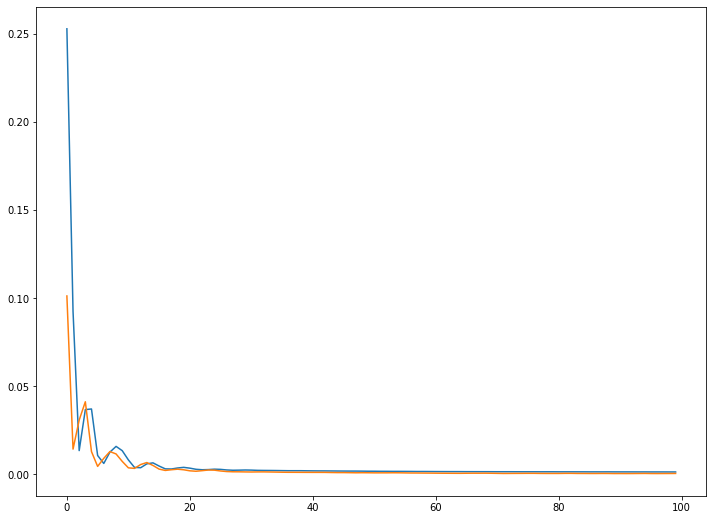

1/1 [==============================] - 0s 39ms/step - loss: 5.9049e-04 - mape: 4.4788
loss = 0.000590492389164865
mape = 4.478825092315674


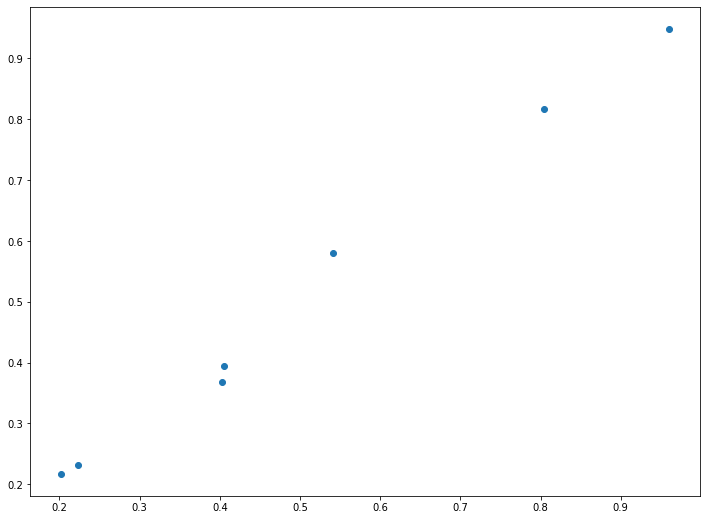

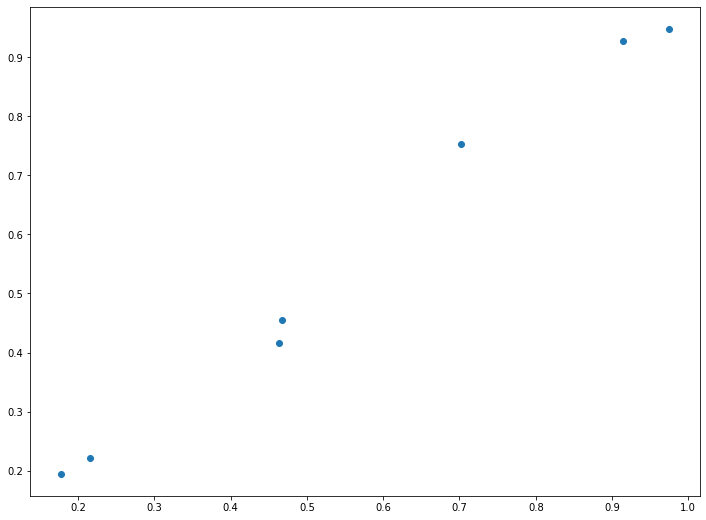

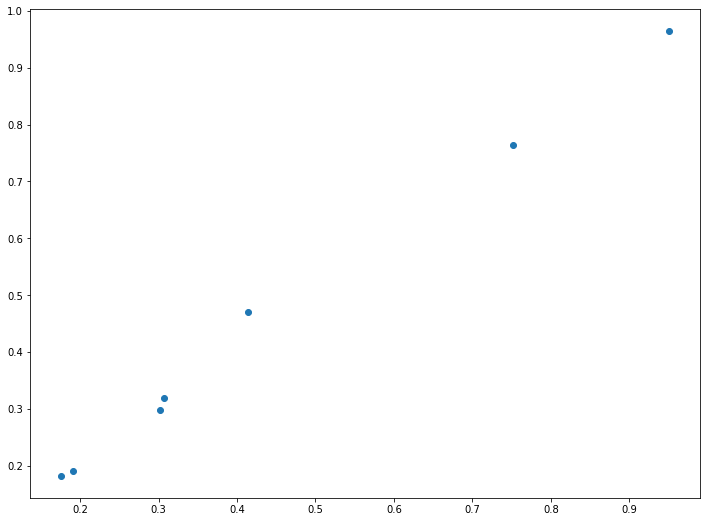

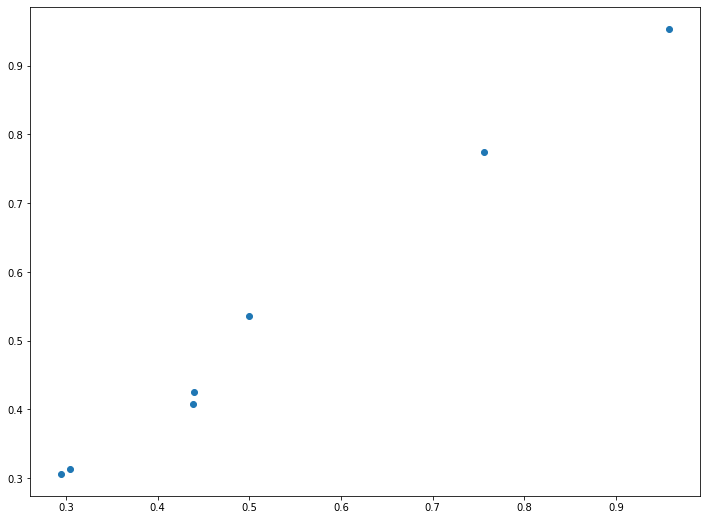

In [ ]:
#GRU 모델을 활용한 데이터 학습

from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(GRU(128, input_shape=input_shape, return_sequences='True'))
model.add(GRU(128))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer='adam', metrics=['mape'])
model.summary()

history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, batch_size=BATCH_SIZE)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print("loss =", loss)
print("mape =", mape)

y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
  plt.scatter(test_y[:,i], y_[:,i])
  plt.show()

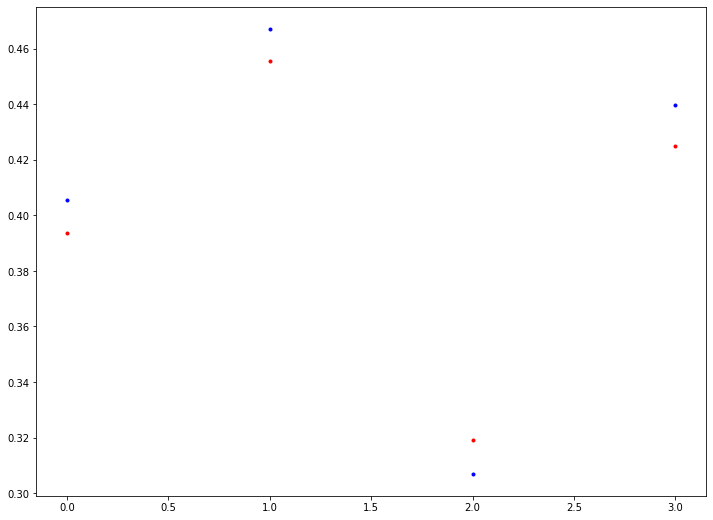

In [ ]:
#normalized Value 확인

plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

In [ ]:
#denormalization

denormalized_test_y = test_y * (maxs - mins) + mins
denormalized_y_ = y_ * (maxs - mins) + mins

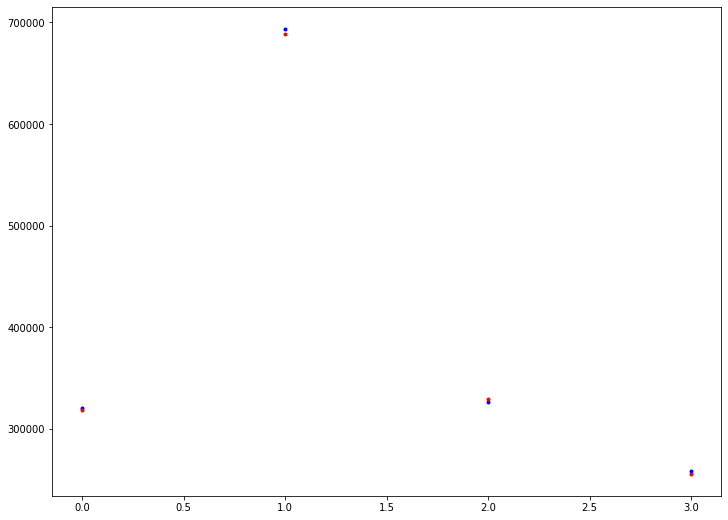

In [ ]:
#denormalized Value 확인

plt.plot(denormalized_test_y[0], 'b.')
plt.plot(denormalized_y_[0], 'r.')
plt.show()

(50,)


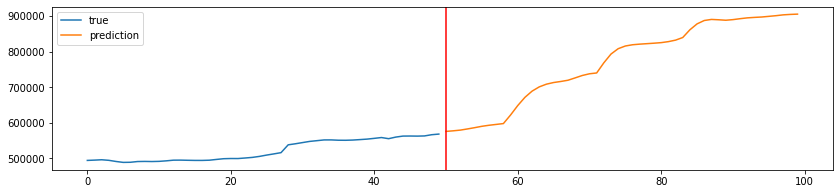

In [ ]:
true_data = np.array(raw_x)[-50:,1,1]

denom_true_data = true_data * (maxs[1] - mins[1]) + mins[1]
plt.figure(figsize=(14,3))
print(denom_true_data.shape)
plt.plot(denom_true_data, label="true")

predict_data = np.array(raw_x)[-50:,:]
y_data = model.predict(predict_data)
denom_y_data = y_data * (maxs - mins) + mins
plt.plot(np.arange(50, 100, 1), denom_y_data[:, 1], label="prediction")
plt.axvline(x=50, color='r')
plt.legend()
plt.show()